# 2 gate pair

In [12]:
means5_u3_and_cnot = [-1.0423814870907937,
 -1.0188940242001687,
 -0.9949465378720438,
 -0.9732428230282938,
 -0.9510288738095438,
 -0.9331516238095438,
 -0.9119269734189188,
 -0.8931035339657938,
 -0.8716790671689187]
std_devs5_u3_and_cnot = [0.01156689862176383,
 0.027064859623805254,
 0.03535505959516701,
 0.03655642629240738,
 0.03892670558512413,
 0.036230456230213426,
 0.032997510270784,
 0.027772019626862068,
 0.017037448300634743]
errs_on_mean5_u3_and_cnot = [0.0003657774510903618,
 0.0008558660096395252,
 0.0011180251513171833,
 0.0011560157020007182,
 0.0012309705145578972,
 0.001145707623545122,
 0.001043472895704769,
 0.0008782283724378369,
 0.0005387714214737096]

In [13]:
means5_cnot =[-1.0419870710751689,
 -1.0209594538876687,
 -0.9986028484189188,
 -0.9807879324032938,
 -0.9613018484189187,
 -0.9441765456845437,
 -0.9238133835751687,
 -0.9056704148251687,
 -0.8882969695126688]
std_devs5_cnot = [0.0115914591724312,
 0.027656316866571218,
 0.03492895820374601,
 0.037631125255649815,
 0.037450729978802694,
 0.03890645506621247,
 0.03310000037652122,
 0.02766168676365857,
 0.017207324780358094]
errs_on_mean5_cnot = [0.00036655412389733033,
 0.0008745695298969612,
 0.0011045506422066105,
 0.001190000667229395,
 0.0011842960676896597,
 0.0012303301369222858,
 0.0010467139174223801,
 0.0008747393409529286,
 0.0005441433874418816]

In [14]:
means5_with_readout = [-1.0021560144345438,
 -0.9501569929501688,
 -0.8981263708798563,
 -0.8511109929501688,
 -0.8006653025204812,
 -0.7565139656064188,
 -0.7125718181454812,
 -0.6715158367001688,
 -0.6291372243954813]

std_devs5_with_readout = [0.01324159845880909,
 0.024913457020470188,
 0.027554506259461528,
 0.029029543629474634,
 0.027443880389122197,
 0.025453678409473376,
 0.023121431843083854,
 0.019008895832274237,
 0.012504755394226762]

errs_on_mean5_with_readout = [0.00041873610991212027,
 0.0007878326857339795,
 0.0008713499958126497,
 0.0009179947730437093,
 0.0008678516986285422,
 0.0008049159860338786,
 0.0007311638738848987,
 0.0006011140663486863,
 0.00039543508629033325]

In [53]:
means5_simulator = [-0.9785098367001688,
 -0.9182290798642313,
 -0.8613802322079812,
 -0.8079686384579814,
 -0.7537573230282938,
 -0.7059826101376687,
 -0.6585936199032938,
 -0.6149629206845437,
 -0.5717607136532938]

std_devs5_simulator = [0.014388686207374598,
 0.034069734774125685,
 0.04217328797993561,
 0.04278626637254914,
 0.04073480433175139,
 0.03821808079948171,
 0.03304957770044469,
 0.0241363117094252,
 0.014438498065928007]

errs_on_mean5_simulator = [0.0004550102095275358,
 0.0010773796116407945,
 0.0013336364643479802,
 0.0013530205431192572,
 0.0012881476172962754,
 0.0012085618312671108,
 0.001045119412401153,
 0.0007632571931757578,
 0.0004565853988026849]

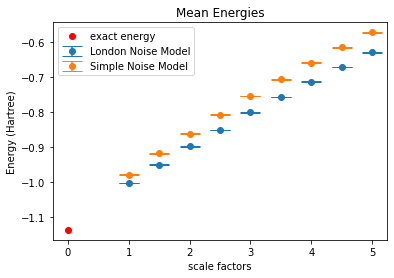

In [54]:
import matplotlib.pyplot as plt
#Plotting means 
f = plt.figure()

scales5 = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
# plt.errorbar(scales5, means5_cnot, yerr= errs_on_mean5_cnot,capsize = 10, fmt ='o', label = 'CNOT' )
# plt.errorbar(scales5, means5_u3_and_cnot, yerr=errs_on_mean5_u3_and_cnot,capsize = 10, fmt ='o', label = 'U3 and CNOT' )

plt.errorbar(scales5, means5_with_readout, yerr= errs_on_mean5_with_readout, capsize = 10, fmt ='o', label = 'London Noise Model' )
plt.errorbar(scales5, means5_simulator, yerr= errs_on_mean5_simulator, capsize = 10, fmt ='o', label = 'Simple Noise Model' )

plt.plot(0, -1.137, 'ro', label = 'exact energy')

plt.title('Mean Energies')
plt.xlabel('scale factors')
plt.ylabel('Energy (Hartree)')
plt.legend()
plt.show()
f.savefig('resultsAug13(3)', dpi = 1000)

# Extrapolation Functions

In [55]:
def RichardsonExtrap_Fraction(energies): 
    """
    Input: An array of energies scaled with different stretch factors--normal integer multiples only --eg 1,2,3,4..
    Assumption: Odd scalings - 1,3,5,7,...
    Output: Zero Error extrapolated answer
    """
    n = len(energies)
    scales = [1+i*0.5 for i in range(n)]
    
    #setting up all equations 
    equations = []
    for eq_num in scales: 
        equation = []
        if eq_num == 1: 
            for i in range(n): 
                equation.append(1)
            equations = [equation]
        else: 
            for term_num in scales: 
                term = term_num**(eq_num*2-2)
                #print(term)
                equation.append(term)
            equations = np.append(equations, [equation], axis = 0)
    #print(equations)
    
    #Now filling up equals to matrix 
    equals_to = [1]
    for i in range(1, n): 
        equals_to.append(0)
    #print(equals_to)
    
    #solving the system
    coeff = np.linalg.solve(equations, equals_to)
    #print(coeff)
    
    #Combine coeff with energies to get zero noise result 
    result = np.dot(coeff, energies)
    return result

In [56]:
def MonteCarloError(means, std_devs, poly_fit = False, deg = 1, sampling_size = 1000): 
    """
    Input: arrays means and standard deviations of the various scalings of noise, whether to do richardson i.e. no poly fit 
    If doing polyfit, then specify degree, sampling_size is how many times to sample from the Gaussian 
    
    Assumption: Scaled by integer values ranging from 1 to X where X>1
    
    Output: Error estimate
    """
    n = len(means)
    
    #Sampling from Gaussian for each scaling 
    all_samples = []
    debug_means = []
    for i in range(n): 
        samples = np.random.normal(means[i], std_devs[i], sampling_size)
        all_samples.append(samples)
        #for debugging
        debug_means.append(means[i] - np.mean(samples))
    #print(debug_means)
    
    #Doing Extrapolation for all sampling_size samples (1000 if set to default)
    zero_noise_energies = []
    for j in range(sampling_size): 
        energies = []
        for i in range(n): 
            energies.append(all_samples[i][j])
            
        ##Doing either richardson or funcs 
        ###Polynomial
        if poly_fit: 
            ####need the scale values: 
            scales = []
            scales = [0.5*c +1 for c in range(n)]
            ####making the function 
            param = np.polyfit(scales, energies, deg, w = [1/i for i in std_devs])
            f = np.poly1d(param)
            ####extrapolation
            result = f(0)
            zero_noise_energies.append(result)
            
        ###Richardson
        else: 
            result = RichardsonExtrap_Fraction(energies)
            zero_noise_energies.append(result)
    
    #Returning error i.e. std 
    error = np.std(zero_noise_energies)
    return error
    
        

In [57]:
import numpy as np

def plottingCalc(means, std_devs):
    """
    Gives out data for plotting energies for extrapolation purposes
    """
    
    highest_degree = len(means) -1
    
    scales = [1+i*0.5 for i in range(len(means))]
    
    # Uncertainties 
    R_uncert = MonteCarloError(means, std_devs, poly_fit = False)
    
    poly_uncerts = []
    for i in range(1, highest_degree+1): 
        uncert = MonteCarloError(means, std_devs, poly_fit = True, deg = i)
        poly_uncerts.append(uncert)
    
    #O energy extrap
    R_zero = RichardsonExtrap_Fraction(means)
    
    poly_zero = []
    funcs = []
    for i in range(1,highest_degree+1): 
        param= np.polyfit(scales, means, i, w=[1/j for j in std_devs])
        p = np.poly1d(param)
        funcs.append(p)
    for f in range(len(funcs)):
        poly_zero.append(funcs[f](0))
    
    return R_uncert, poly_uncerts, R_zero, poly_zero

In [61]:
exact_energy = [-1.137]

num_data = 2
meanses = []
std_devses = []
labelses_Poly = []
labelses_Rich= []
colors_poly = []
colors_rich = []

In [62]:
meanses = [ means5_with_readout, means5_simulator]
std_devses = [std_devs5_with_readout, std_devs5_simulator]
labelses_Poly = [ 'London Noise Model (Poly)', 'Simple Noise Model (Poly)']
labelses_Rich = [ 'London Noise Model (Rich)', 'Simple Noise Model (Rich)']
colors_poly = ['tab:blue', 'tab:orange']
colors_rich = ['cyan', 'pink']

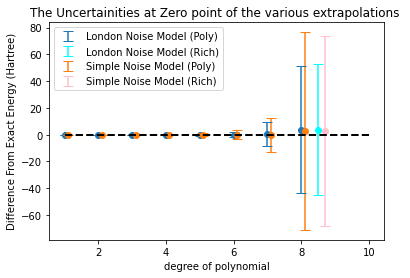

In [64]:
a = plt.figure()
for i in range(num_data): 
    means = meanses[i]
    std_devs = std_devses[i]
#     label_poly = lablses_Poly[i]
#     label_rich = lablses_Rich[i]
    degrees = [j+1+0.1*i for j in range(len(means)-1)]
    
    R_uncert, poly_uncerts, R_zero, poly_zero = plottingCalc(means, std_devs)
#     print(poly_zero)
#     print(degrees)
    
    plt.errorbar(degrees, [energy - exact_energy[0] for energy in poly_zero], yerr=poly_uncerts, capsize = 5,fmt =' ', ecolor = colors_poly[i], label = labelses_Poly[i] )
    plt.errorbar(degrees[-1]+.5+.1*i, R_zero- exact_energy[0], yerr=R_uncert, capsize = 5,fmt =' ', ecolor = colors_rich[i] , label = labelses_Rich[i])
    plt.plot(degrees, [energy - exact_energy[0] for energy in poly_zero], linestyle = ' ', marker = 'o', color = colors_poly[i])
    plt.plot(degrees[-1]+.5+.1*i, R_zero- exact_energy[0],  linestyle = ' ', marker = 'o', color = colors_rich[i] )
    

#plt.axis([0.9, 9, 0, 0.07])
    
plt.xlabel('degree of polynomial')
plt.ylabel('Difference From Exact Energy (Hartree)')
plt.title('The Uncertainities at Zero point of the various extrapolations ')
points =[i+1 for i in range(len(means5_with_readout))]
points+=[len(means5_with_readout)+1]
plt.plot(points, [0*i for i in points], linestyle = '--', color = 'black' , linewidth = 2)
plt.legend()
plt.show()
a.savefig('August13(4)', dpi = 1000)

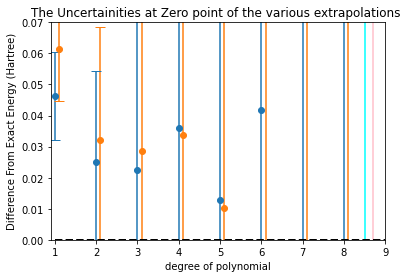

In [66]:
a = plt.figure()
for i in range(num_data): 
    means = meanses[i]
    std_devs = std_devses[i]
#     label_poly = lablses_Poly[i]
#     label_rich = lablses_Rich[i]
    degrees = [j+1+0.1*i for j in range(len(means)-1)]
    
    R_uncert, poly_uncerts, R_zero, poly_zero = plottingCalc(means, std_devs)
#     print(poly_zero)
#     print(degrees)
    
    plt.errorbar(degrees, [energy - exact_energy[0] for energy in poly_zero], yerr=poly_uncerts, capsize = 5,fmt =' ', ecolor = colors_poly[i], label = labelses_Poly[i] )
    plt.errorbar(degrees[-1]+.5+.1*i, R_zero- exact_energy[0], yerr=R_uncert, capsize = 5,fmt =' ', ecolor = colors_rich[i] , label = labelses_Rich[i])
    plt.plot(degrees, [energy - exact_energy[0] for energy in poly_zero], linestyle = ' ', marker = 'o', color = colors_poly[i])
    plt.plot(degrees[-1]+.5+.1*i, R_zero- exact_energy[0],  linestyle = ' ', marker = 'o', color = colors_rich[i] )
    

plt.axis([0.9, 9, 0, 0.07])
    
plt.xlabel('degree of polynomial')
plt.ylabel('Difference From Exact Energy (Hartree)')
plt.title('The Uncertainities at Zero point of the various extrapolations ')
points =[i+1 for i in range(len(means5_with_readout))]
points+=[len(means5_with_readout)+1]
plt.plot(points, [0*i for i in points], linestyle = '--', color = 'black' , linewidth = 2)
#plt.legend()
plt.show()
a.savefig('August13(5)', dpi = 1000)